In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [21]:
import datetime

In [22]:
time_series_df=pd.read_csv('Maritius_AOI_20200701_0731_full.csv')

In [116]:
time_series_df.tail()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
27298,2020-07-31 22:58:32 UTC,538007688,1,-20.538240,57.877547,12.1,234.9,230.0,-7.0
27299,2020-07-31 22:58:42 UTC,538007688,1,-20.538560,57.877067,12.3,235.1,230.0,-1.0
27300,2020-07-31 22:58:51 UTC,538007688,1,-20.538880,57.876613,12.1,235.4,230.0,-6.0
27301,2020-07-31 22:59:02 UTC,538007688,1,-20.539200,57.876107,12.1,234.9,230.0,4.0
27302,2020-07-31 23:00:03 UTC,538007688,1,-20.541173,57.873200,12.1,234.1,229.0,4.0


In [24]:
time_series_df.sort_values(by=['timestamp'], inplace=True)

In [25]:
time_series_df.head()

,created_at,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot,...,ship_and_cargo_type,length,width,eta,destination,status,maneuver,accuracy,collection_type,mmsi_label
10542,2020-07-01 12:16:25.371996 UTC,2020-07-01 12:00:17 UTC,538007271,1,-20.469147,58.065653,12.1,54.5,55.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,satellite,mmsi-538007271
10540,2020-07-01 12:16:25.371996 UTC,2020-07-01 12:00:28 UTC,538007271,1,-20.468800,58.066133,12.1,54.0,55.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,satellite,mmsi-538007271
21417,2020-07-01 12:16:09.704405 UTC,2020-07-01 12:01:28 UTC,538007271,1,-20.466800,58.069067,12.3,54.2,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,satellite,mmsi-538007271
26983,2020-07-01 12:34:10.282561 UTC,2020-07-01 12:08:37 UTC,538007271,1,-20.452747,58.090373,12.4,54.6,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,satellite,mmsi-538007271
15975,2020-07-01 12:34:10.282561 UTC,2020-07-01 12:10:06 UTC,538007271,1,-20.449760,58.094827,12.2,54.5,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,satellite,mmsi-538007271


In [26]:
print(time_series_df.loc[time_series_df['timestamp'] == '2020-07'])

Empty DataFrame
Columns: [created_at, timestamp, mmsi, msg_type, latitude, longitude, speed, course, heading, rot, imo, name, call_sign, flag, draught, ship_and_cargo_type, length, width, eta, destination, status, maneuver, accuracy, collection_type, mmsi_label]
Index: []

[0 rows x 25 columns]


In [28]:
time_sorted_df = time_series_df.sort_values(by=['timestamp'], inplace=True)


In [31]:
# Convert the timestamp column, allowing mixed formats and handling UTC time zones
time_series_df['timestamp'] = pd.to_datetime(time_series_df['timestamp'], format=None, errors='ignore')

# This keeps any unrecognized formats unchanged in the 'timestamp' column without converting them to NaT
print(time_series_df['timestamp'].head())


10542    2020-07-01 12:00:17 UTC
10540    2020-07-01 12:00:28 UTC
21417    2020-07-01 12:01:28 UTC
26983    2020-07-01 12:08:37 UTC
15975    2020-07-01 12:10:06 UTC
Name: timestamp, dtype: object


/var/folders/sc/39j8dw012qxch356lnz1yc6h0000gn/T/ipykernel_56696/2459463761.py:2: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead



In [32]:

time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27978 entries, 10542 to 1005
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           27978 non-null  object 
 1   timestamp            27978 non-null  object 
 2   mmsi                 27978 non-null  int64  
 3   msg_type             27978 non-null  int64  
 4   latitude             27736 non-null  float64
 5   longitude            27736 non-null  float64
 6   speed                27307 non-null  float64
 7   course               27307 non-null  float64
 8   heading              27162 non-null  float64
 9   rot                  26999 non-null  float64
 10  imo                  639 non-null    float64
 11  name                 660 non-null    object 
 12  call_sign            650 non-null    object 
 13  flag                 27978 non-null  object 
 14  draught              639 non-null    float64
 15  ship_and_cargo_type  650 non-null    f

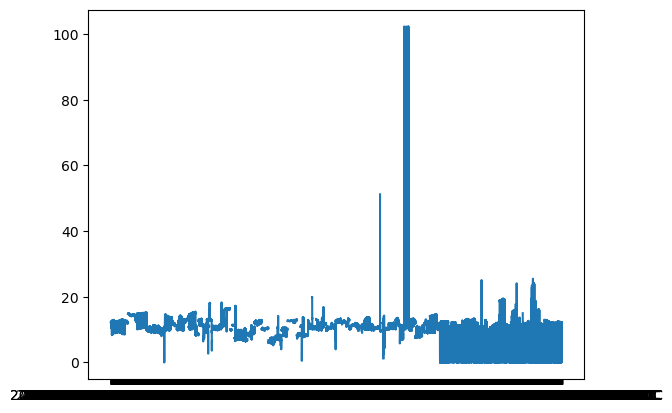

In [33]:
plt.plot(time_series_df['timestamp'], time_series_df['speed'])

In [34]:
time_series_df.drop(["call_sign", "flag" ,"draught" , "ship_and_cargo_type",  "length", "width","eta" , "destination",  "status", "maneuver",  "accuracy" ,"collection_type" ,'mmsi_label'], axis=1, inplace=True)


In [35]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27978 entries, 10542 to 1005
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  27978 non-null  object 
 1   timestamp   27978 non-null  object 
 2   mmsi        27978 non-null  int64  
 3   msg_type    27978 non-null  int64  
 4   latitude    27736 non-null  float64
 5   longitude   27736 non-null  float64
 6   speed       27307 non-null  float64
 7   course      27307 non-null  float64
 8   heading     27162 non-null  float64
 9   rot         26999 non-null  float64
 10  imo         639 non-null    float64
 11  name        660 non-null    object 
dtypes: float64(7), int64(2), object(3)
memory usage: 2.8+ MB


In [36]:
time_series_df.drop(['created_at','imo', 'name'], axis=1, inplace=True)

In [37]:
time_series_df.head()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
10542,2020-07-01 12:00:17 UTC,538007271,1,-20.469147,58.065653,12.1,54.5,55.0,0.0
10540,2020-07-01 12:00:28 UTC,538007271,1,-20.468800,58.066133,12.1,54.0,55.0,0.0
21417,2020-07-01 12:01:28 UTC,538007271,1,-20.466800,58.069067,12.3,54.2,57.0,0.0
26983,2020-07-01 12:08:37 UTC,538007271,1,-20.452747,58.090373,12.4,54.6,56.0,0.0
15975,2020-07-01 12:10:06 UTC,538007271,1,-20.449760,58.094827,12.2,54.5,56.0,0.0


In [38]:
time_series_df = time_series_df[time_series_df['speed'].notna()]

In [39]:
time_series_df.head()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
10542,2020-07-01 12:00:17 UTC,538007271,1,-20.469147,58.065653,12.1,54.5,55.0,0.0
10540,2020-07-01 12:00:28 UTC,538007271,1,-20.468800,58.066133,12.1,54.0,55.0,0.0
21417,2020-07-01 12:01:28 UTC,538007271,1,-20.466800,58.069067,12.3,54.2,57.0,0.0
26983,2020-07-01 12:08:37 UTC,538007271,1,-20.452747,58.090373,12.4,54.6,56.0,0.0
15975,2020-07-01 12:10:06 UTC,538007271,1,-20.449760,58.094827,12.2,54.5,56.0,0.0


In [40]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27307 entries, 10542 to 1005
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  27307 non-null  object 
 1   mmsi       27307 non-null  int64  
 2   msg_type   27307 non-null  int64  
 3   latitude   27307 non-null  float64
 4   longitude  27307 non-null  float64
 5   speed      27307 non-null  float64
 6   course     27307 non-null  float64
 7   heading    27162 non-null  float64
 8   rot        26999 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.1+ MB


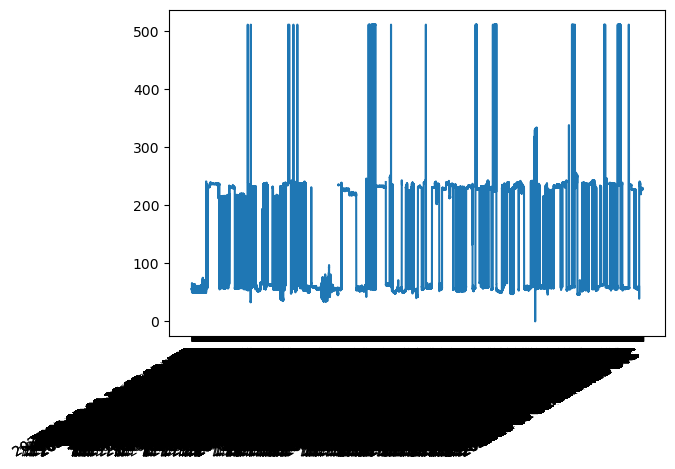

In [56]:
plt.plot( time_series_df['timestamp'], time_series_df['heading'])
plt.gcf().autofmt_xdate()
plt.show()

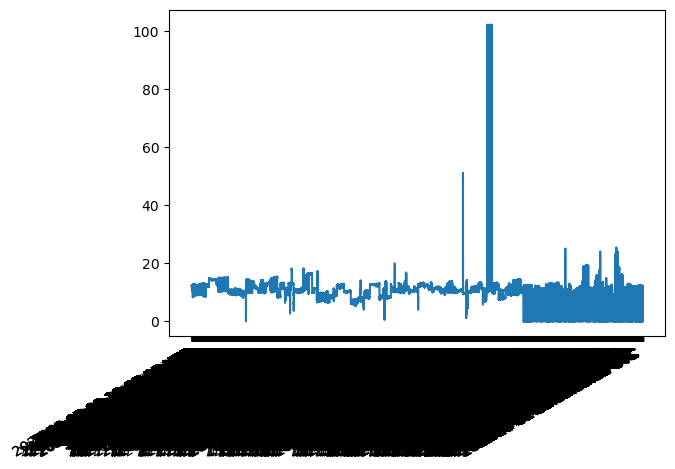

In [42]:
plt.plot( time_series_df['timestamp'], time_series_df['speed'])
plt.gcf().autofmt_xdate()
plt.show()

In [43]:
time_series_df = time_series_df.reset_index(drop=True)

In [44]:
time_series_df.head()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
0,2020-07-01 12:00:17 UTC,538007271,1,-20.469147,58.065653,12.1,54.5,55.0,0.0
1,2020-07-01 12:00:28 UTC,538007271,1,-20.468800,58.066133,12.1,54.0,55.0,0.0
2,2020-07-01 12:01:28 UTC,538007271,1,-20.466800,58.069067,12.3,54.2,57.0,0.0
3,2020-07-01 12:08:37 UTC,538007271,1,-20.452747,58.090373,12.4,54.6,56.0,0.0
4,2020-07-01 12:10:06 UTC,538007271,1,-20.449760,58.094827,12.2,54.5,56.0,0.0


In [45]:
len(time_series_df[(time_series_df['heading']==0)])

1

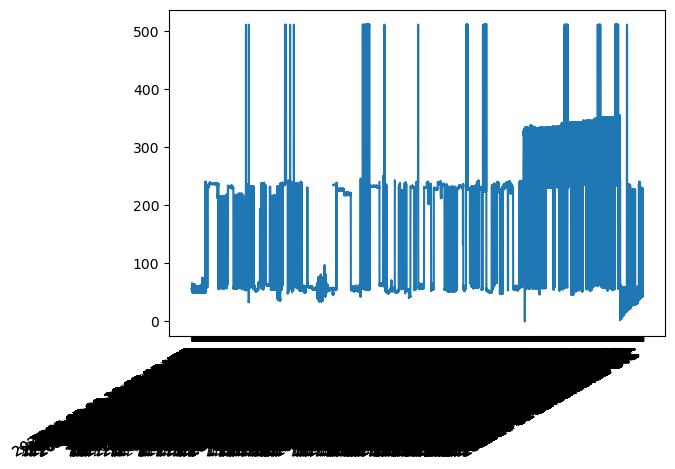

In [46]:
plt.plot( time_series_df['timestamp'], time_series_df['heading'])
plt.gcf().autofmt_xdate()
plt.show()


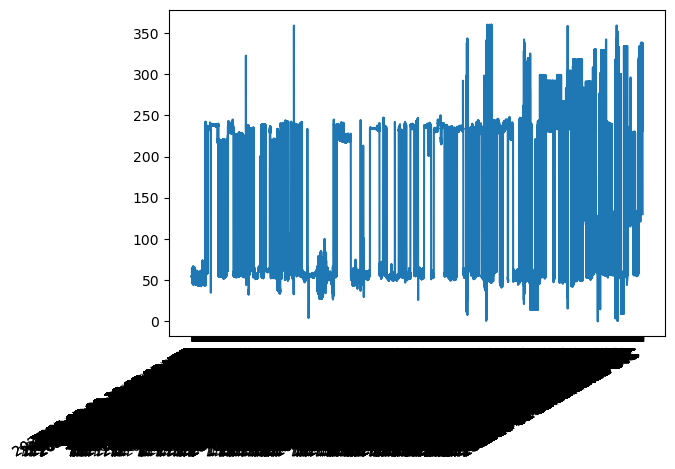

In [47]:
plt.plot( time_series_df['timestamp'], time_series_df['course'])
plt.gcf().autofmt_xdate()
plt.show()

In [49]:
time_series_df.head()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
0,2020-07-01 12:00:17 UTC,538007271,1,-20.469147,58.065653,12.1,54.5,55.0,0.0
1,2020-07-01 12:00:28 UTC,538007271,1,-20.468800,58.066133,12.1,54.0,55.0,0.0
2,2020-07-01 12:01:28 UTC,538007271,1,-20.466800,58.069067,12.3,54.2,57.0,0.0
3,2020-07-01 12:08:37 UTC,538007271,1,-20.452747,58.090373,12.4,54.6,56.0,0.0
4,2020-07-01 12:10:06 UTC,538007271,1,-20.449760,58.094827,12.2,54.5,56.0,0.0


In [50]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27307 entries, 0 to 27306
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  27307 non-null  object 
 1   mmsi       27307 non-null  int64  
 2   msg_type   27307 non-null  int64  
 3   latitude   27307 non-null  float64
 4   longitude  27307 non-null  float64
 5   speed      27307 non-null  float64
 6   course     27307 non-null  float64
 7   heading    27162 non-null  float64
 8   rot        26999 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.9+ MB


In [57]:
time_series_df.drop(time_series_df[time_series_df['speed'] == 0].index, inplace = True) 


In [51]:
time_series_df.info()
time_series_df.drop(time_series_df[time_series_df['speed'] == 0].index, inplace = True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27307 entries, 0 to 27306
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  27307 non-null  object 
 1   mmsi       27307 non-null  int64  
 2   msg_type   27307 non-null  int64  
 3   latitude   27307 non-null  float64
 4   longitude  27307 non-null  float64
 5   speed      27307 non-null  float64
 6   course     27307 non-null  float64
 7   heading    27162 non-null  float64
 8   rot        26999 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.9+ MB


In [52]:
time_series_df.mmsi.unique() 

array([538007271, 373014000, 477209900, 351090000, 538008956, 477020100,
       538004284, 636018308, 565024000, 249947000, 371626000, 477100500,
       229731000, 538004594, 374628000, 538006385, 645464000, 477614500,
       355800000, 477392800, 311019600, 311000589, 645465000, 538007026,
       477191300, 352422000, 412398000, 538008466, 356268000, 538004903,
       210246000, 374539000, 229757000, 636011491, 565334000, 566704000,
       636019432, 538008128, 563109300, 636014331, 239947000, 538007523,
       314481000, 412421093, 636017588, 241283000, 355581000, 538004985,
       636018812, 563025700, 636019904, 563001700, 258994000, 477360200,
       477701000, 636018935, 565661000, 373795000, 248430000, 218549000,
       636020002, 412331089, 248804000, 538008161, 636019872, 477327900,
       371377000, 636015696, 477826400, 372632000, 636016168, 353184000,
       413196000, 538006997, 636018642, 477847200, 636018629, 477978100,
       209171000, 405000079, 636013468, 538007737, 

In [53]:
mv_value = 372711000
param = 'heading'

In [58]:
time_series_df[time_series_df["mmsi"]==mv_value]

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
19803,2020-07-25 12:09:25 UTC,372711000,1,-20.150400,58.327413,11.6,245.0,241.0,0.0
19809,2020-07-25 12:09:55 UTC,372711000,1,-20.151067,58.325813,11.7,245.0,241.0,0.0
19811,2020-07-25 12:10:02 UTC,372711000,1,-20.150853,58.326347,11.7,246.0,240.0,-5.0
19813,2020-07-25 12:10:22 UTC,372711000,1,-20.151253,58.325333,11.7,246.0,240.0,0.0
19815,2020-07-25 12:10:31 UTC,372711000,1,-20.151493,58.324827,11.7,246.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...
20255,2020-07-25 18:04:32 UTC,372711000,1,-20.442853,57.743147,0.1,290.0,334.0,5.0
20271,2020-07-25 18:29:18 UTC,372711000,1,-20.442773,57.743120,0.1,313.0,332.0,0.0
20274,2020-07-25 18:29:32 UTC,372711000,1,-20.442773,57.743147,0.1,315.0,332.0,5.0
22362,2020-07-27 00:02:30 UTC,372711000,3,-20.442160,57.742667,0.1,79.0,338.0,-5.0


In [59]:
len(time_series_df[time_series_df["mmsi"]==mv_value])

178

In [60]:
len(time_series_df[time_series_df["speed"]==0])

0

In [61]:
mv_data = time_series_df[time_series_df['mmsi']==mv_value]

In [62]:
mv_data.head()

,timestamp,mmsi,msg_type,latitude,longitude,speed,course,heading,rot
19803,2020-07-25 12:09:25 UTC,372711000,1,-20.150400,58.327413,11.6,245.0,241.0,0.0
19809,2020-07-25 12:09:55 UTC,372711000,1,-20.151067,58.325813,11.7,245.0,241.0,0.0
19811,2020-07-25 12:10:02 UTC,372711000,1,-20.150853,58.326347,11.7,246.0,240.0,-5.0
19813,2020-07-25 12:10:22 UTC,372711000,1,-20.151253,58.325333,11.7,246.0,240.0,0.0
19815,2020-07-25 12:10:31 UTC,372711000,1,-20.151493,58.324827,11.7,246.0,240.0,0.0


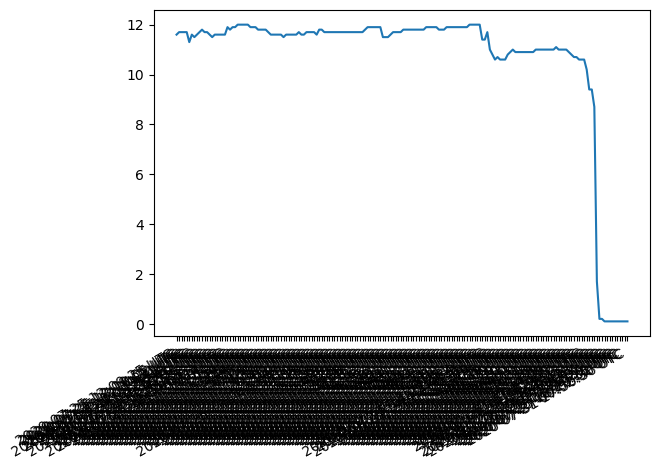

In [63]:
plt.plot( mv_data['timestamp'], mv_data['speed'])
plt.gcf().autofmt_xdate()
plt.show()

In [64]:
other_data = time_series_df[time_series_df['mmsi'] == 538007271]

In [66]:
len(other_data)

15

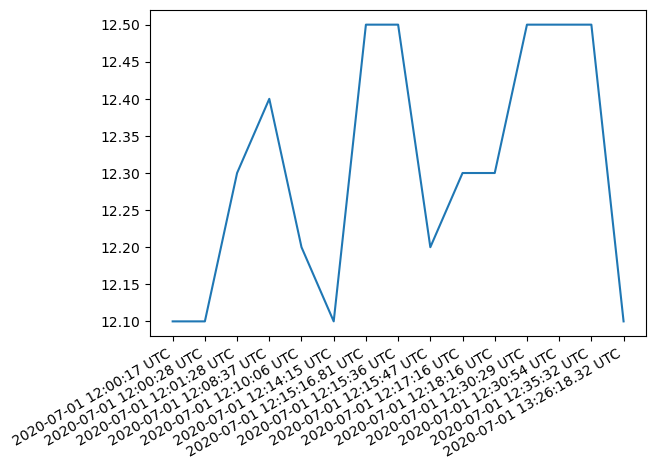

In [67]:
plt.plot(other_data['timestamp'], other_data['speed'])
plt.gcf().autofmt_xdate()
plt.show()

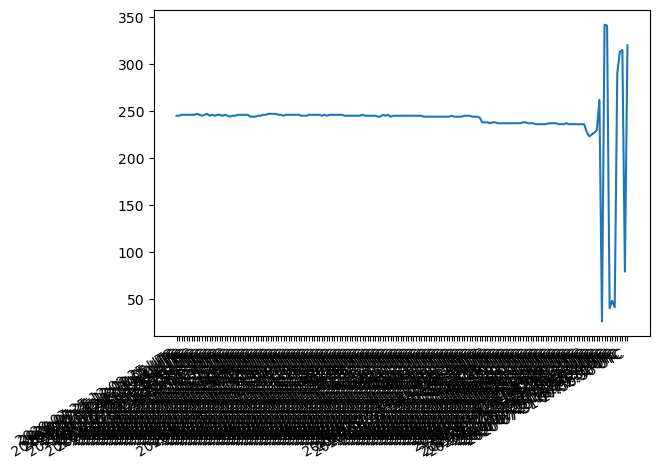

In [68]:
plt.plot( mv_data['timestamp'], mv_data['course'])
plt.gcf().autofmt_xdate()
plt.show()

In [69]:
mv_data = mv_data.drop(['mmsi','msg_type','latitude', 'longitude'], axis=1)
mv_data.head()

,timestamp,speed,course,heading,rot
19803,2020-07-25 12:09:25 UTC,11.6,245.0,241.0,0.0
19809,2020-07-25 12:09:55 UTC,11.7,245.0,241.0,0.0
19811,2020-07-25 12:10:02 UTC,11.7,246.0,240.0,-5.0
19813,2020-07-25 12:10:22 UTC,11.7,246.0,240.0,0.0
19815,2020-07-25 12:10:31 UTC,11.7,246.0,240.0,0.0


In [70]:
mv_data = mv_data[mv_data['speed'].notna()]
mv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 19803 to 27073
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  178 non-null    object 
 1   speed      178 non-null    float64
 2   course     178 non-null    float64
 3   heading    178 non-null    float64
 4   rot        178 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.3+ KB


In [71]:
mv_data.head()


,timestamp,speed,course,heading,rot
19803,2020-07-25 12:09:25 UTC,11.6,245.0,241.0,0.0
19809,2020-07-25 12:09:55 UTC,11.7,245.0,241.0,0.0
19811,2020-07-25 12:10:02 UTC,11.7,246.0,240.0,-5.0
19813,2020-07-25 12:10:22 UTC,11.7,246.0,240.0,0.0
19815,2020-07-25 12:10:31 UTC,11.7,246.0,240.0,0.0


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
df2 = mv_data
names=df2.columns
x = mv_data[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [80]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])


In [81]:
mv_data['pc1']=pd.Series(principalDf['pc1'].values, index=mv_data.index)
mv_data['pc2']=pd.Series(principalDf['pc2'].values, index=mv_data.index)

In [83]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

8.284431248741282e-06


In [84]:
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  0.05326037895558695


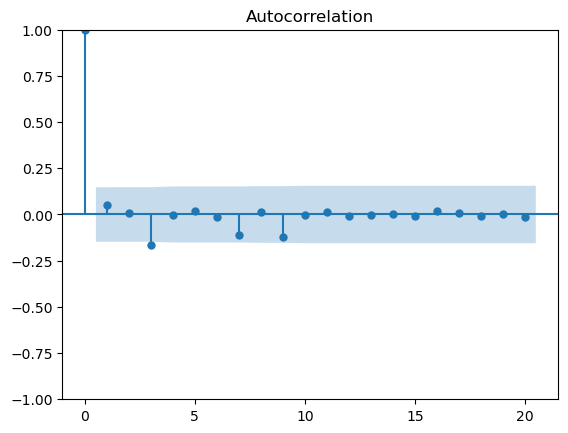

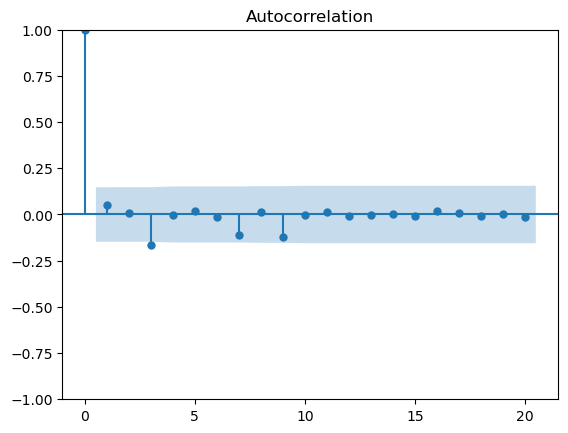

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [86]:
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0004631482736590919


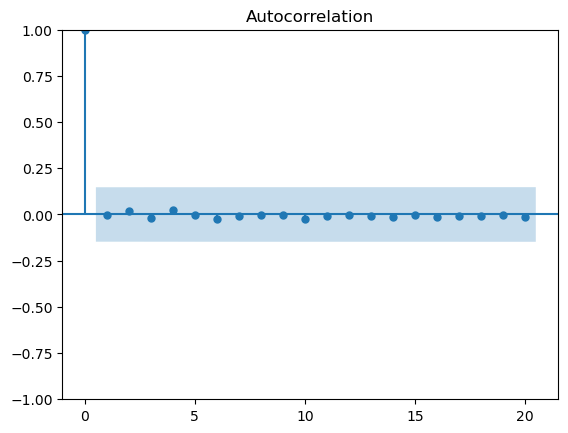

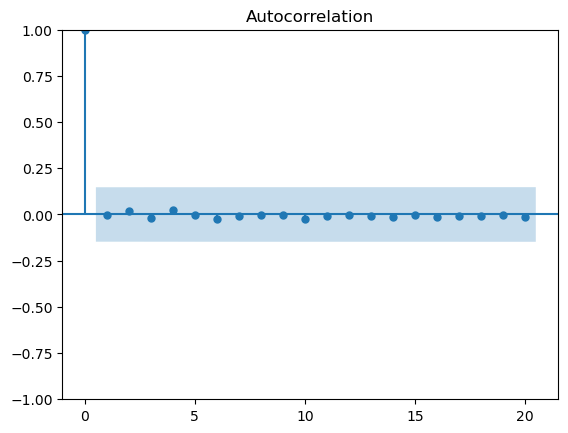

In [87]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [89]:
#pc1 outlier
q1_pc1, q3_pc1 = mv_data['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

In [90]:
#pc2 outlier
q1_pc2, q3_pc2 = mv_data['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [91]:
lower_pc1, upper_pc1

(-15.201428154812664, 3.8887593226750026)

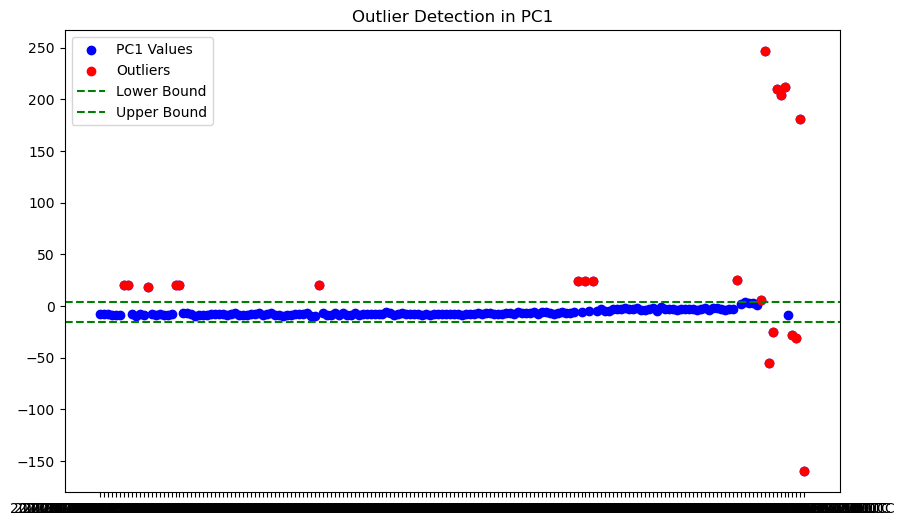

In [92]:
# Identifying outliers in pc1
outliers_pc1 = mv_data[(mv_data['pc1'] < lower_pc1) | (mv_data['pc1'] > upper_pc1)]

# Plotting to visualize outliers
plt.figure(figsize=(10,6))
plt.scatter(mv_data.index, mv_data['pc1'], label="PC1 Values", color='blue')
plt.scatter(outliers_pc1.index, outliers_pc1['pc1'], label="Outliers", color='red')
plt.axhline(y=lower_pc1, color='green', linestyle='--', label="Lower Bound")
plt.axhline(y=upper_pc1, color='green', linestyle='--', label="Upper Bound")
plt.legend()
plt.title("Outlier Detection in PC1")
plt.show()


                            speed  course  heading    rot         pc1  \
timestamp                                                               
2020-07-25 12:20:23.41 UTC   11.6   246.0    241.0 -128.0   20.016446   
2020-07-25 12:21:55.4 UTC    11.5   246.0    241.0 -128.0   20.019717   
2020-07-25 12:38:16.03 UTC   11.7   247.0    240.0 -128.0   18.712561   
2020-07-25 12:58:06.63 UTC   11.6   246.0    241.0 -128.0   20.016446   
2020-07-25 13:07:03.3 UTC    11.9   245.0    241.0 -128.0   20.885392   
2020-07-25 13:24:26.21 UTC   11.6   246.0    241.0 -128.0   20.016446   
2020-07-25 14:15:45.67 UTC   11.4   238.0    234.0 -128.0   24.100134   
2020-07-25 14:22:46.9 UTC    11.7   238.0    234.0 -128.0   24.090319   
2020-07-25 14:45:56.42 UTC   10.8   238.0    234.0 -128.0   24.119765   
2020-07-25 15:16:06.2 UTC    10.6   236.0    232.0 -128.0   25.040132   
2020-07-25 15:25:03 UTC       9.4   223.0    227.0   12.0    3.483334   
2020-07-25 15:28:46.94 UTC    0.2   262.0    239.0 

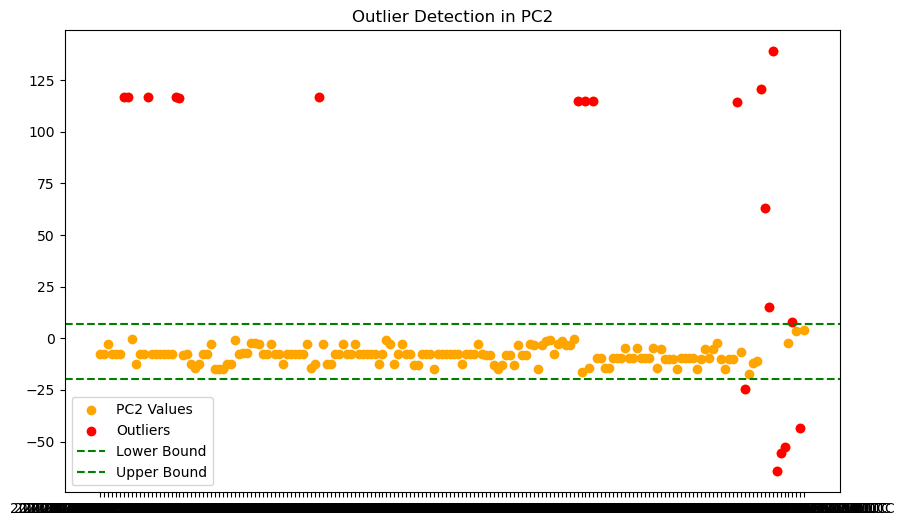

In [93]:
# Detecting outliers in PC2
outliers_pc2 = mv_data[(mv_data['pc2'] < lower_pc2) | (mv_data['pc2'] > upper_pc2)]

# Display the outliers
print(outliers_pc2)

# Visualize the outliers
plt.figure(figsize=(10,6))
plt.scatter(mv_data.index, mv_data['pc2'], label="PC2 Values", color='orange')
plt.scatter(outliers_pc2.index, outliers_pc2['pc2'], label="Outliers", color='red')
plt.axhline(y=lower_pc2, color='green', linestyle='--', label="Lower Bound")
plt.axhline(y=upper_pc2, color='green', linestyle='--', label="Upper Bound")
plt.legend()
plt.title("Outlier Detection in PC2")
plt.show()


In [94]:
lower_pc2, upper_pc2

(-19.86430909794296, 6.978047636610677)

In [95]:
mv_data['anomaly_pc1'] = ((mv_data['pc1']>upper_pc1) | (mv_data['pc1']<lower_pc1)).astype('int')
mv_data['anomaly_pc2'] = ((mv_data['pc2']>upper_pc2) | (mv_data['pc2']<lower_pc2)).astype('int')


In [96]:
mv_data['anomaly_pc1'].value_counts()

anomaly_pc1
0    157
1     21
Name: count, dtype: int64

In [97]:
mv_data['anomaly_pc2'].value_counts()

anomaly_pc2
0    158
1     20
Name: count, dtype: int64

In [98]:
outliers_pc1 = mv_data.loc[(mv_data['pc1']>upper_pc1) | (mv_data['pc1']<lower_pc1), 'pc1']
outliers_pc2 = mv_data.loc[(mv_data['pc2']>upper_pc2) | (mv_data['pc2']<lower_pc2), 'pc2']


In [99]:
print("PC1 Outliers:\n", outliers_pc1)
print("PC2 Outliers:\n", outliers_pc2)


PC1 Outliers:
 timestamp
2020-07-25 12:20:23.41 UTC     20.016446
2020-07-25 12:21:55.4 UTC      20.019717
2020-07-25 12:38:16.03 UTC     18.712561
2020-07-25 12:58:06.63 UTC     20.016446
2020-07-25 13:07:03.3 UTC      20.885392
2020-07-25 13:24:26.21 UTC     20.016446
2020-07-25 14:15:45.67 UTC     24.100134
2020-07-25 14:22:46.9 UTC      24.090319
2020-07-25 14:45:56.42 UTC     24.119765
2020-07-25 15:16:06.2 UTC      25.040132
2020-07-25 15:28:46.94 UTC      5.485532
2020-07-25 16:33:56.73 UTC    246.621466
2020-07-25 17:03:41 UTC       -54.685016
2020-07-25 17:04:06.47 UTC    -25.545027
2020-07-25 17:35:16 UTC       209.999359
2020-07-25 17:35:57 UTC       204.514797
2020-07-25 17:36:26 UTC       211.770087
2020-07-25 18:29:18 UTC       -28.357208
2020-07-25 18:29:32 UTC       -31.218687
2020-07-27 00:02:30 UTC       180.908223
2020-07-31 17:50:36 UTC      -159.877051
Name: pc1, dtype: float64
PC2 Outliers:
 timestamp
2020-07-25 12:20:23.41 UTC    116.777766
2020-07-25 12:21:55.4 

In [101]:
len(outliers_pc1)/len(mv_data)

0.11797752808988764

In [102]:
len(outliers_pc2)/len(mv_data)

0.11235955056179775

In [103]:
mv_data.head()

,speed,course,heading,rot,pc1,pc2,anomaly_pc1,anomaly_pc2
timestamp,,,,,,,,
2020-07-25 12:09:25 UTC,11.6,245.0,241.0,0.0,-7.366019,-7.698192,0,0
2020-07-25 12:09:55 UTC,11.7,245.0,241.0,0.0,-7.369291,-7.698880,0,0
2020-07-25 12:10:02 UTC,11.7,246.0,240.0,-5.0,-7.565949,-2.597924,0,0
2020-07-25 12:10:22 UTC,11.7,246.0,240.0,0.0,-8.669903,-7.450870,0,0
2020-07-25 12:10:31 UTC,11.7,246.0,240.0,0.0,-8.669903,-7.450870,0,0


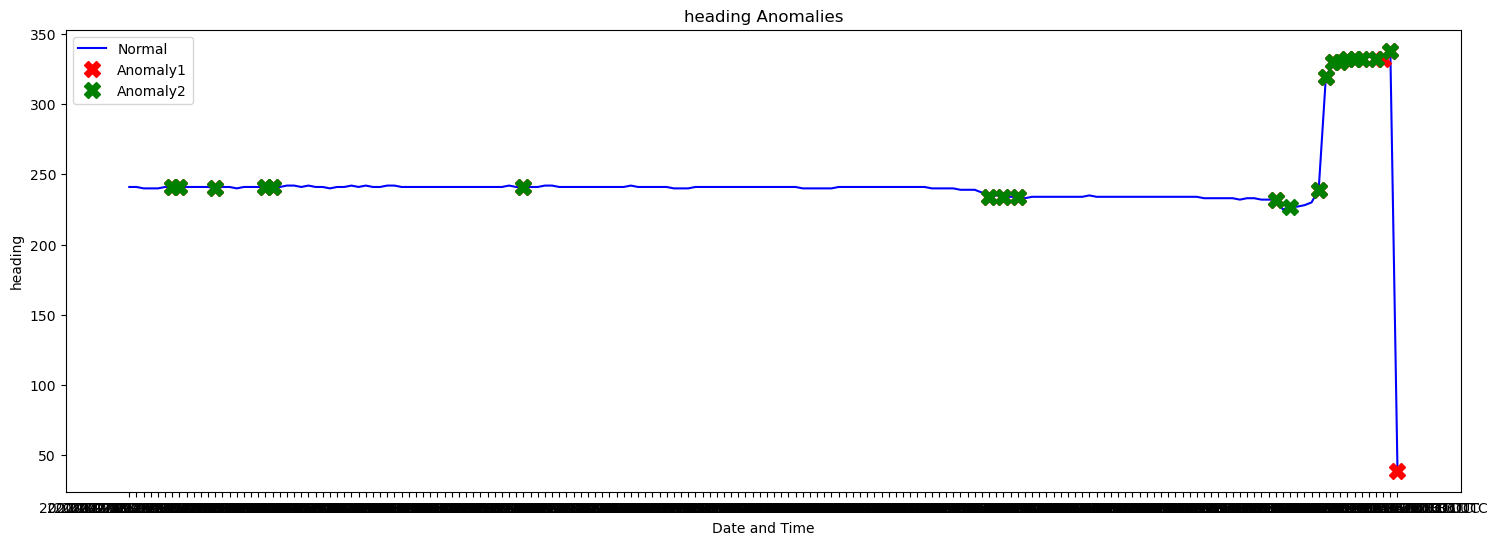

In [104]:
a = mv_data[mv_data['anomaly_pc1'] == 1] #anomaly
b = mv_data[mv_data['anomaly_pc2'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(mv_data[param], color='blue', label='Normal')
plt.plot(a[param], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly1')
plt.plot(b[param], linestyle='none', marker='X', color='green', markersize=12, label='Anomaly2')
plt.xlabel('Date and Time')
plt.ylabel(param)
plt.title(param +' Anomalies')
plt.legend(loc='best')
plt.show();
data1 = a
data2 = b

In [105]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.05
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))

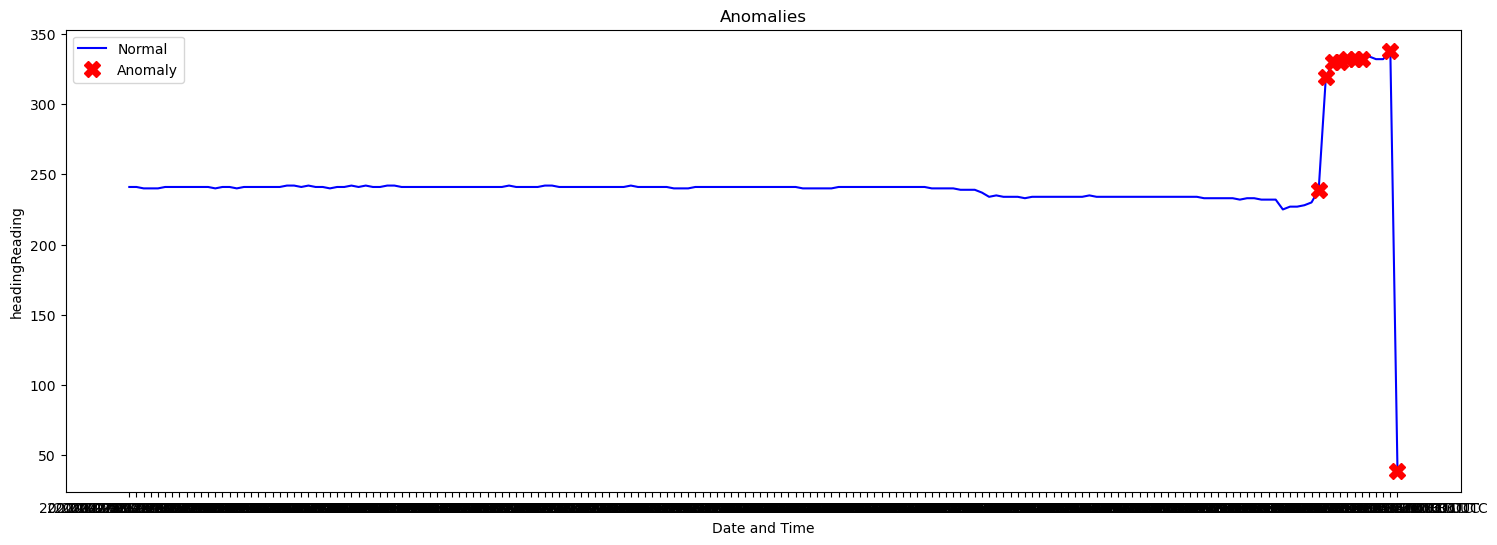

In [106]:
mv_data['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=mv_data.index)
a = mv_data.loc[mv_data['anomaly2'] == -1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(mv_data[param], color='blue', label='Normal')
plt.plot(a[param], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Date and Time')
plt.ylabel(param +'Reading')
plt.title('Anomalies')
plt.legend(loc='best')
plt.show();
data4 = a

In [115]:
mv_data.head()

,speed,course,heading,rot,pc1,pc2,anomaly_pc1,anomaly_pc2,anomaly2
timestamp,,,,,,,,,
2020-07-25 12:09:25 UTC,11.6,245.0,241.0,0.0,-7.366019,-7.698192,0,0,1
2020-07-25 12:09:55 UTC,11.7,245.0,241.0,0.0,-7.369291,-7.698880,0,0,1
2020-07-25 12:10:02 UTC,11.7,246.0,240.0,-5.0,-7.565949,-2.597924,0,0,1
2020-07-25 12:10:22 UTC,11.7,246.0,240.0,0.0,-8.669903,-7.450870,0,0,1
2020-07-25 12:10:31 UTC,11.7,246.0,240.0,0.0,-8.669903,-7.450870,0,0,1


In [107]:
mv_data['anomaly2'].value_counts()

anomaly2
 1    169
-1      9
Name: count, dtype: int64

In [110]:
data1.head()

,speed,course,heading,rot,pc1,pc2,anomaly_pc1,anomaly_pc2
timestamp,,,,,,,,
2020-07-25 12:20:23.41 UTC,11.6,246.0,241.0,-128.0,20.016446,116.777766,1,1
2020-07-25 12:21:55.4 UTC,11.5,246.0,241.0,-128.0,20.019717,116.778454,1,1
2020-07-25 12:38:16.03 UTC,11.7,247.0,240.0,-128.0,18.712561,117.025087,1,1
2020-07-25 12:58:06.63 UTC,11.6,246.0,241.0,-128.0,20.016446,116.777766,1,1
2020-07-25 13:07:03.3 UTC,11.9,245.0,241.0,-128.0,20.885392,116.535175,1,1


In [111]:
data2.head()

,speed,course,heading,rot,pc1,pc2,anomaly_pc1,anomaly_pc2
timestamp,,,,,,,,
2020-07-25 12:20:23.41 UTC,11.6,246.0,241.0,-128.0,20.016446,116.777766,1,1
2020-07-25 12:21:55.4 UTC,11.5,246.0,241.0,-128.0,20.019717,116.778454,1,1
2020-07-25 12:38:16.03 UTC,11.7,247.0,240.0,-128.0,18.712561,117.025087,1,1
2020-07-25 12:58:06.63 UTC,11.6,246.0,241.0,-128.0,20.016446,116.777766,1,1
2020-07-25 13:07:03.3 UTC,11.9,245.0,241.0,-128.0,20.885392,116.535175,1,1
